In [333]:
import pandas as pd

In [334]:
df = pd.read_csv("PLACES__Local_Data_for_Better_Health__County_Data_2024_release_20250620.csv", engine="python")
df.describe()

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,TotalPop18plus,LocationID
count,240886.000000,240886.000000,240886.000000,240886.000000,2.408860e+05,2.408860e+05,240886.000000
mean,2021.897777,25.793842,23.213787,28.436679,2.162907e+05,1.692237e+05,30372.252360
std,0.302941,21.806707,20.516978,23.057834,6.079978e+06,4.758322e+06,15112.488466
min,2021.000000,1.700000,1.500000,1.800000,5.100000e+01,3.700000e+01,59.000000
25%,2022.000000,9.800000,8.700000,11.000000,1.076900e+04,8.398000e+03,19021.000000
50%,2022.000000,17.700000,15.500000,20.100000,2.594000e+04,2.045900e+04,29161.000000
75%,2022.000000,33.900000,29.400000,38.500000,6.882600e+04,5.368600e+04,45077.000000
max,2022.000000,91.600000,90.000000,93.100000,3.332876e+08,2.608367e+08,56045.000000


In [335]:
df = df[df["Data_Value_Type"] == "Crude prevalence"].pivot(index=["LocationID", "LocationName"], columns="Short_Question_Text", values="Data_Value").reset_index().dropna()


In [336]:
X = df[["Obesity", "High Cholesterol" ,  "Current Cigarette Smoking", "Coronary Heart Disease", "Short Sleep Duration"]] 
y = df["Diabetes"]

print(X.head())

Short_Question_Text  Obesity  High Cholesterol  Current Cigarette Smoking  \
1                       38.9              35.9                       15.5   
2                       36.8              38.9                       14.0   
3                       43.3              39.4                       20.9   
4                       41.4              38.6                       21.1   
5                       37.3              40.0                       19.1   

Short_Question_Text  Coronary Heart Disease  Short Sleep Duration  
1                                       7.4                  37.3  
2                                       8.2                  34.8  
3                                      10.5                  43.0  
4                                       8.8                  40.6  
5                                       9.2                  36.5  


In [337]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

In [338]:
model = DecisionTreeRegressor(random_state=1)
# model = Ridge(alpha=1.0)
model.fit(train_X, train_y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [339]:
val_predictions = model.predict(val_X)
mean_absolute_error(val_y, val_predictions)

1.1653061224489796

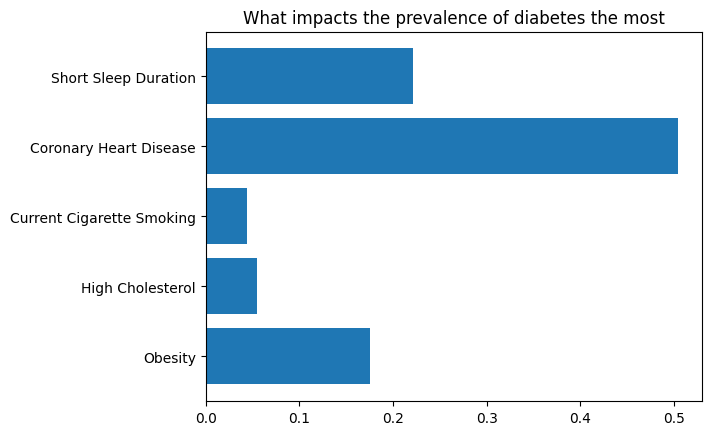

In [340]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
features = X.columns
plt.barh(features, importance)
plt.title("What impacts the prevalence of diabetes the most")
plt.show()

# coef = model.coef_
# plt.barh(features, coef)
# plt.show()

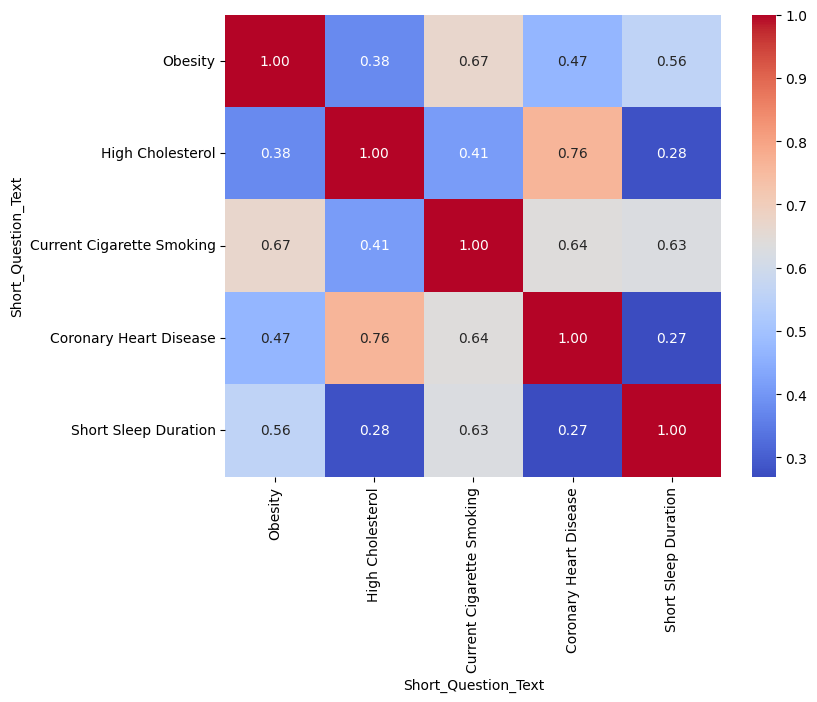

In [341]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [342]:
print(X["Obesity"].describe())

count    2350.000000
mean       38.078255
std         4.489628
min        17.600000
25%        35.600000
50%        38.700000
75%        41.100000
max        52.200000
Name: Obesity, dtype: float64
